## Importing Libraries and Setup

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set matplotlib style for better-looking plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# For Jupyter notebook, ensure plots display inline
%matplotlib inline
print("Libraries imported successfully!")

Libraries imported successfully!


## Load and Explore Dataset

In [69]:
# Load the Titanic dataset from Seaborn
print("Loading Titanic dataset from Seaborn...")
df = sns.load_dataset('titanic')
print("Dataset loaded successfully from Seaborn!")

# Dataset Overview
print(f"\nDataset Shape: {df.shape}")
print(f"Total Passengers: {len(df)}")

# Display first few rows
print("\nFirst 5 rows:")
display(df.head())

# Display dataset info
print("\nDataset Info:")
print(f"Columns: {list(df.columns)}")
print(f"\nData Types:")
display(df.dtypes.to_frame('Data Type'))

Loading Titanic dataset from Seaborn...
Dataset loaded successfully from Seaborn!

Dataset Shape: (891, 15)
Total Passengers: 891

First 5 rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



Dataset Info:
Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

Data Types:


,Data Type
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


## Missing values analysis

In [70]:
# Missing values analysis
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing %': missing_percent.values
})

print("="*60)
print("Missing Values Summary:")
print("="*60)
display(missing_df[missing_df['Missing Count'] > 0])

# Basic statistics
print("="*60)
print("Statistical Summary:")
print("="*60)
display(df.describe())

Missing Values Summary:


,Column,Missing Count,Missing %
3,age,177,19.87
7,embarked,2,0.22
11,deck,688,77.22
12,embark_town,2,0.22


Statistical Summary:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Missing Data Visualizations

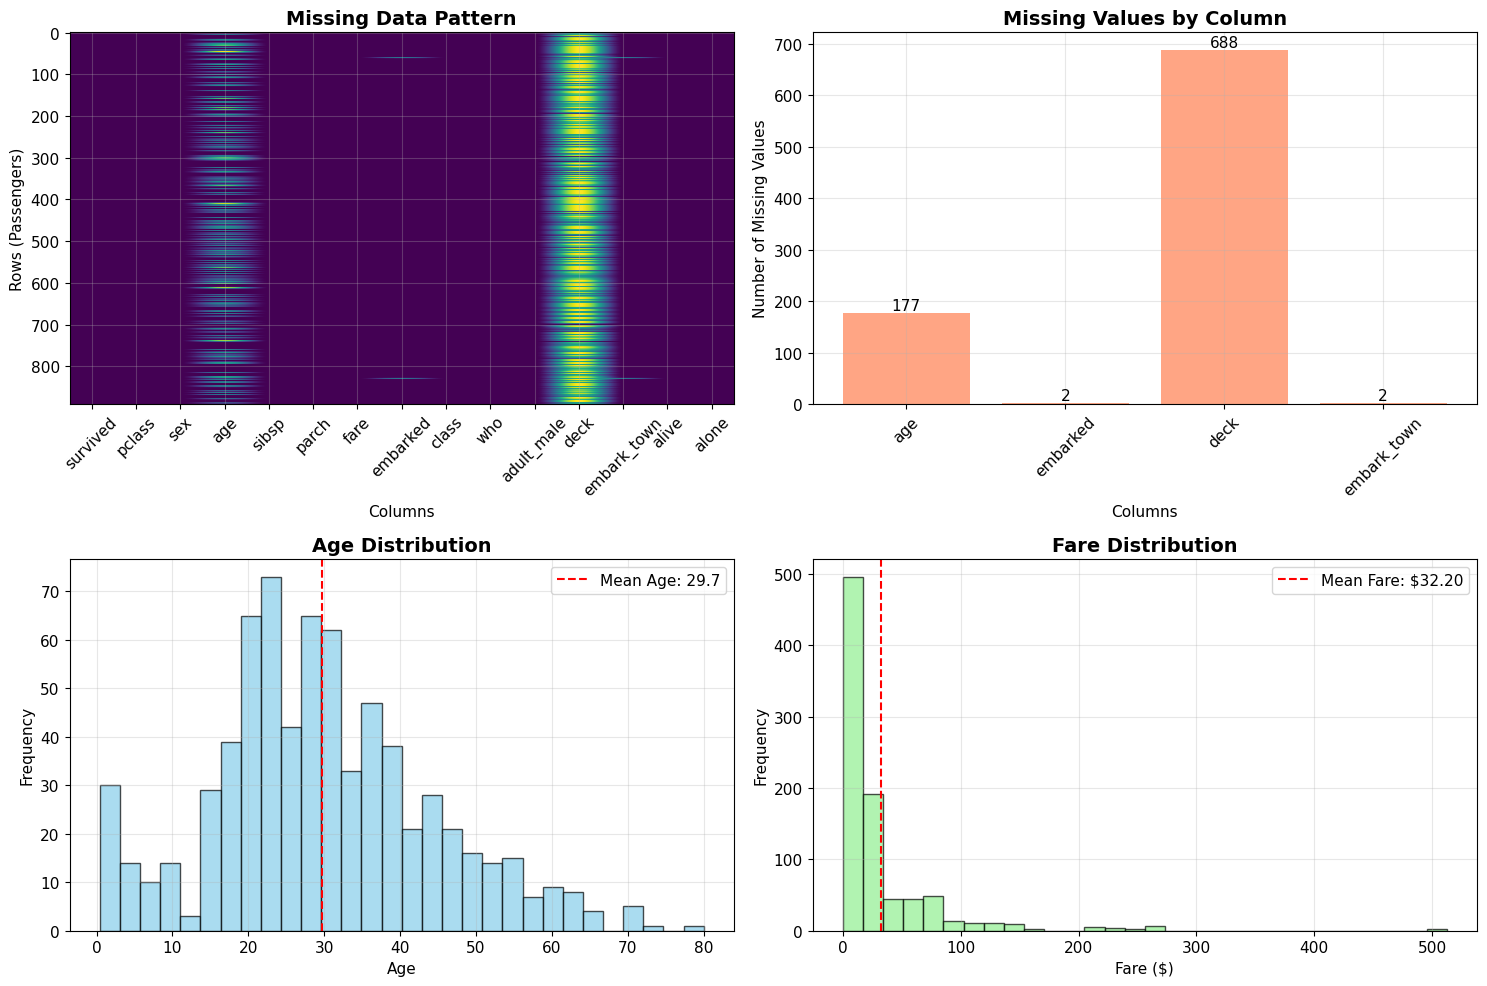

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Missing data heatmap
ax1 = axes[0, 0]
missing_matrix = df.isnull()
im1 = ax1.imshow(missing_matrix, cmap='viridis', aspect='auto')
ax1.set_title('Missing Data Pattern', fontsize=14, fontweight='bold')
ax1.set_xlabel('Columns')
ax1.set_ylabel('Rows (Passengers)')
ax1.set_xticks(range(len(df.columns)))
ax1.set_xticklabels(df.columns, rotation=45)

# Missing data bar chart
ax2 = axes[0, 1]
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
bars = ax2.bar(missing_counts.index, missing_counts.values, color='coral', alpha=0.7)
ax2.set_title('Missing Values by Column', fontsize=14, fontweight='bold')
ax2.set_xlabel('Columns')
ax2.set_ylabel('Number of Missing Values')
ax2.tick_params(axis='x', rotation=45)
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

# Age distribution
ax3 = axes[1, 0]
ax3.hist(df['age'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax3.axvline(df['age'].mean(), color='red', linestyle='--', 
           label=f'Mean Age: {df["age"].mean():.1f}')
ax3.set_title('Age Distribution', fontsize=14, fontweight='bold')
ax3.set_xlabel('Age')
ax3.set_ylabel('Frequency')
ax3.legend()

# Fare distribution
ax4 = axes[1, 1]
ax4.hist(df['fare'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
ax4.axvline(df['fare'].mean(), color='red', linestyle='--', 
           label=f'Mean Fare: ${df["fare"].mean():.2f}')
ax4.set_title('Fare Distribution', fontsize=14, fontweight='bold')
ax4.set_xlabel('Fare ($)')
ax4.set_ylabel('Frequency')
ax4.legend()

plt.tight_layout()
plt.show()

## Survival Analysis

SURVIVAL ANALYSIS
Overall Survival Statistics:
• Total Passengers: 891
• Survivors: 342
• Overall Survival Rate: 38.4%


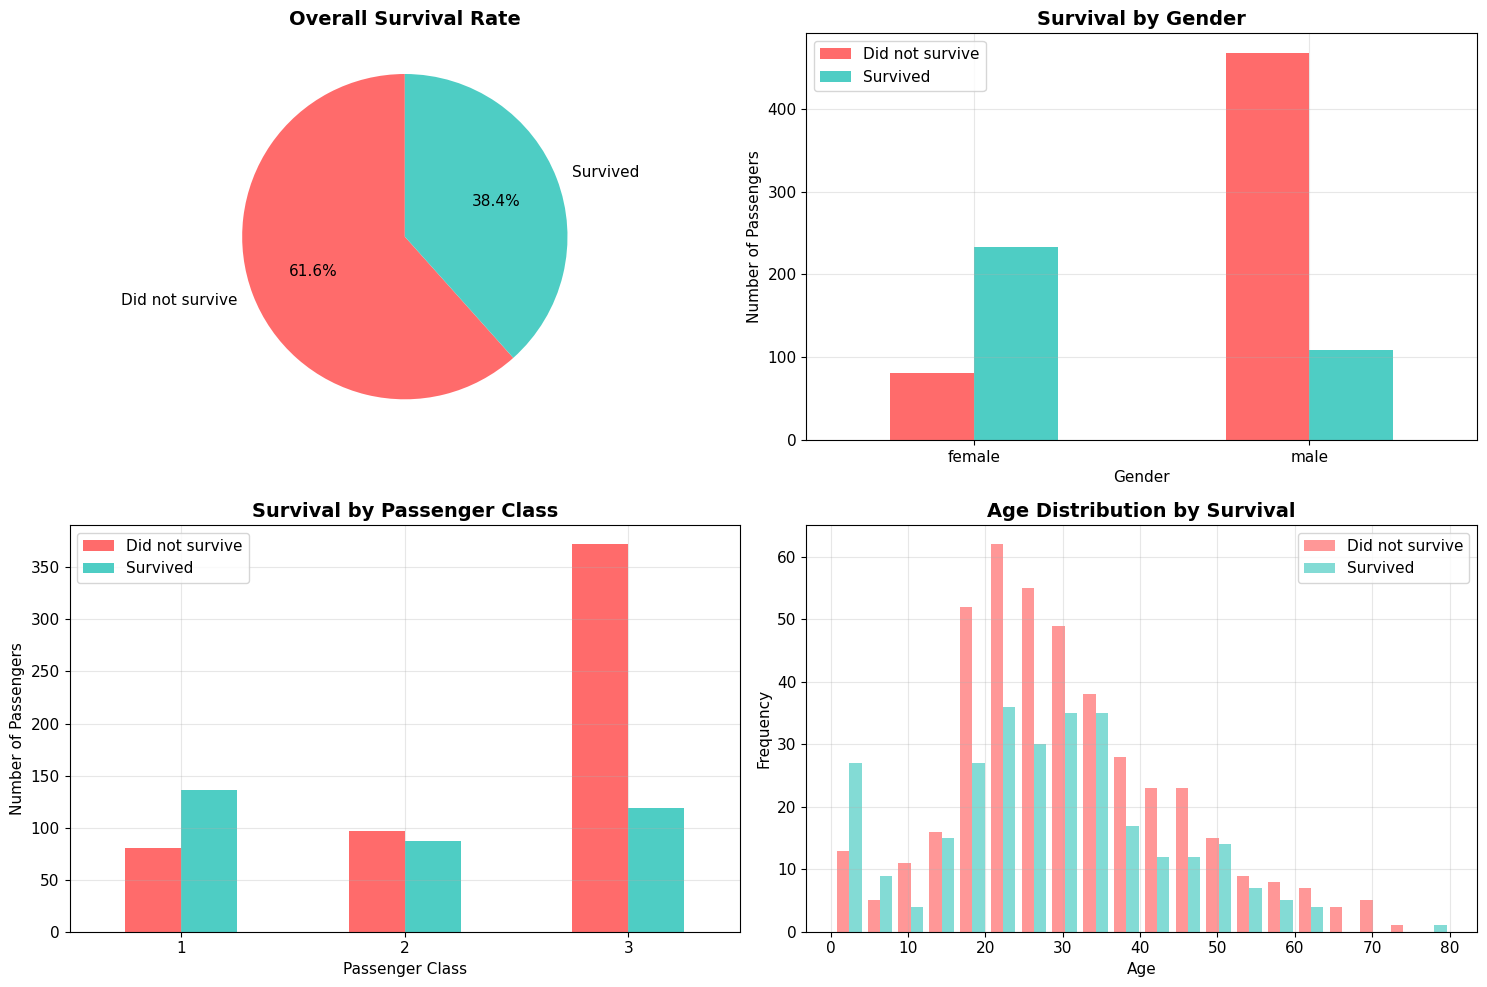

In [72]:
print("="*60)
print("SURVIVAL ANALYSIS")
print("="*60)

# Calculate survival statistics
total_passengers = len(df)
total_survived = df['survived'].sum()
survival_rate = (total_survived / total_passengers) * 100

print(f"Overall Survival Statistics:")
print(f"• Total Passengers: {total_passengers:,}")
print(f"• Survivors: {total_survived:,}")
print(f"• Overall Survival Rate: {survival_rate:.1f}%")

# Create survival analysis visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Overall survival rate pie chart
ax1 = axes[0, 0]
survival_counts = df['survived'].value_counts()
colors = ['#FF6B6B', '#4ECDC4']
labels = ['Did not survive', 'Survived']
ax1.pie(survival_counts.values, labels=labels, autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax1.set_title('Overall Survival Rate', fontsize=14, fontweight='bold')

# Survival by Gender
ax2 = axes[0, 1]
gender_survival = pd.crosstab(df['sex'], df['survived'])
gender_survival.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Survival by Gender', fontsize=14, fontweight='bold')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Number of Passengers')
ax2.legend(['Did not survive', 'Survived'])
ax2.tick_params(axis='x', rotation=0)

# Survival by Passenger Class
ax3 = axes[1, 0]
class_survival = pd.crosstab(df['pclass'], df['survived'])
class_survival.plot(kind='bar', ax=ax3, color=colors)
ax3.set_title('Survival by Passenger Class', fontsize=14, fontweight='bold')
ax3.set_xlabel('Passenger Class')
ax3.set_ylabel('Number of Passengers')
ax3.legend(['Did not survive', 'Survived'])
ax3.tick_params(axis='x', rotation=0)

# Age distribution by survival
ax4 = axes[1, 1]
survived_ages = df[df['survived'] == 1]['age'].dropna()
not_survived_ages = df[df['survived'] == 0]['age'].dropna()
ax4.hist([not_survived_ages, survived_ages], bins=20, alpha=0.7, 
         color=['#FF6B6B', '#4ECDC4'], label=['Did not survive', 'Survived'])
ax4.set_title('Age Distribution by Survival', fontsize=14, fontweight='bold')
ax4.set_xlabel('Age')
ax4.set_ylabel('Frequency')
ax4.legend()

plt.tight_layout()
plt.show()

## Advanced Survival Analysis

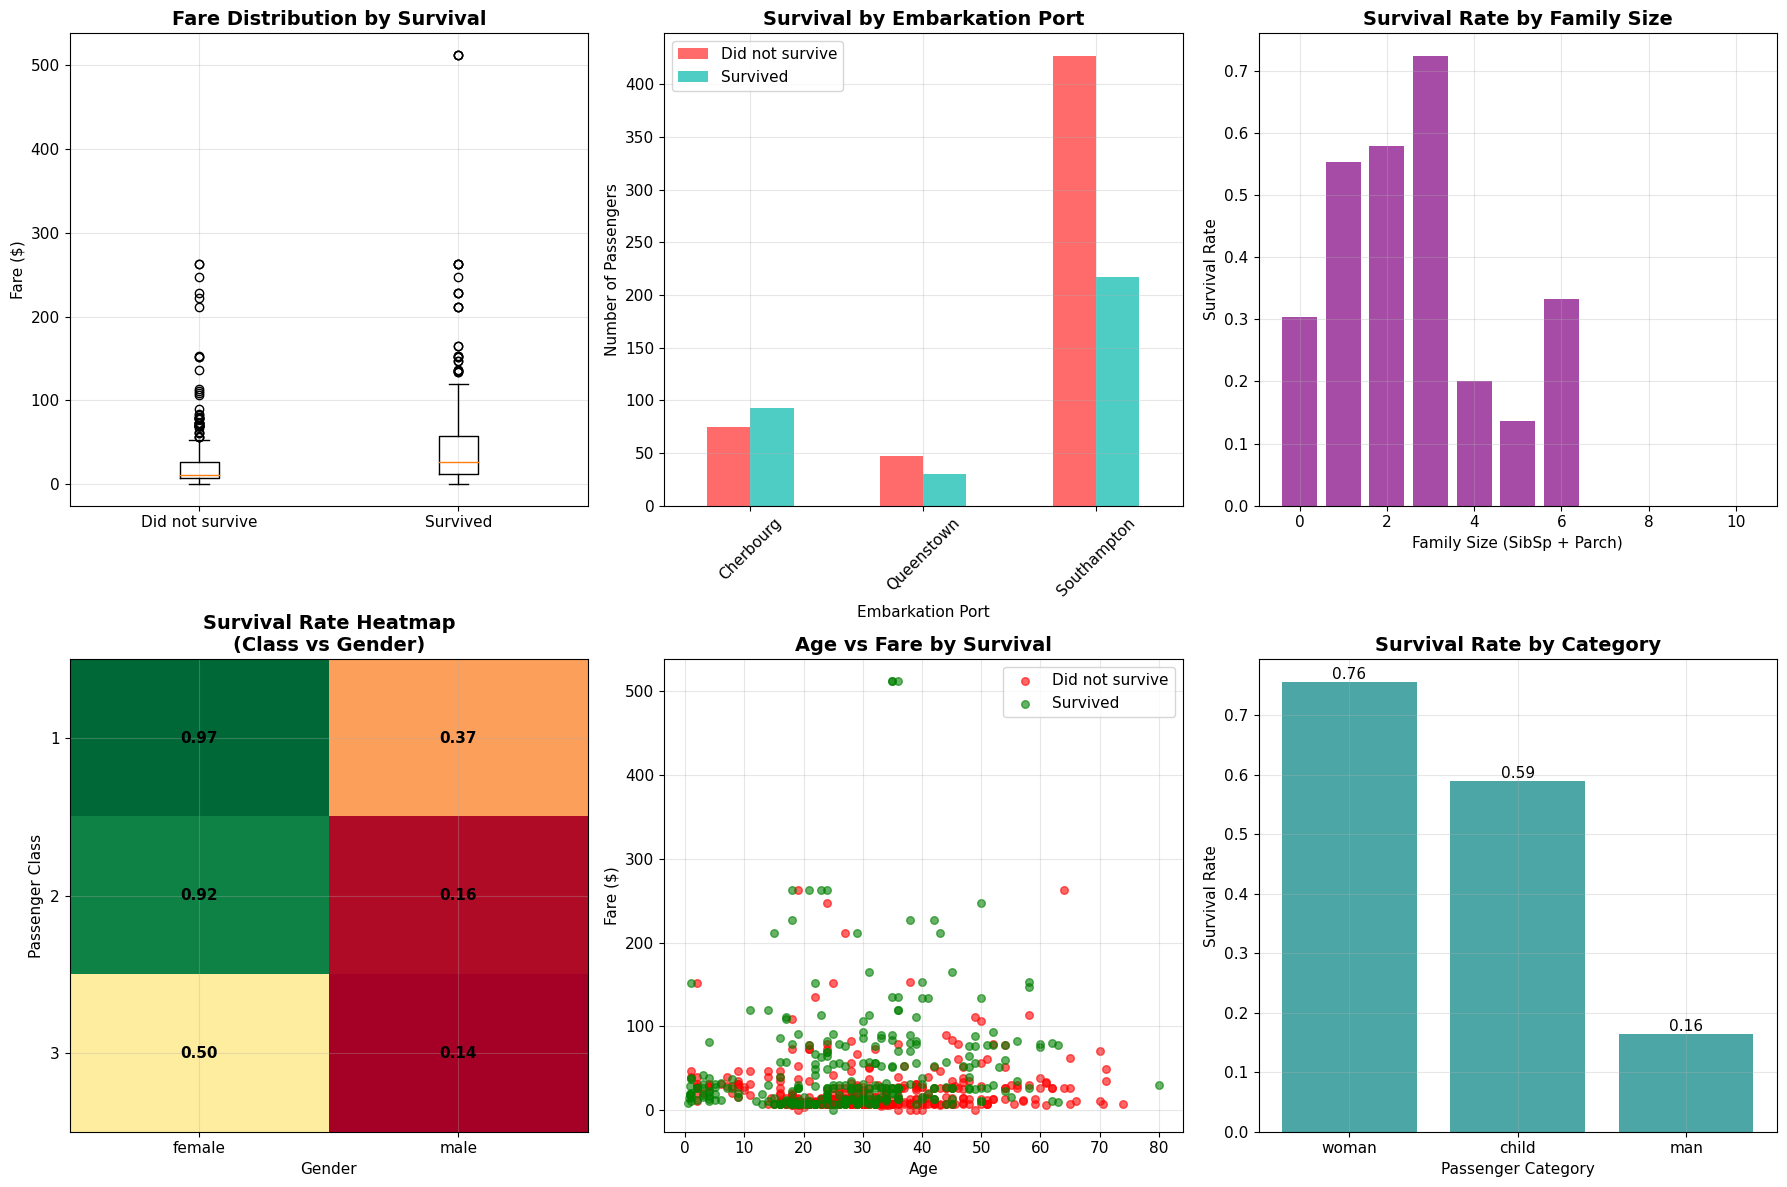

In [73]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Fare vs Survival boxplot
ax1 = axes[0, 0]
ax1.boxplot([df[df['survived'] == 0]['fare'], df[df['survived'] == 1]['fare']], 
            labels=['Did not survive', 'Survived'])
ax1.set_title('Fare Distribution by Survival', fontsize=14, fontweight='bold')
ax1.set_ylabel('Fare ($)')

# Survival by Embarkation Port
ax2 = axes[0, 1]
embarked_survival = pd.crosstab(df['embark_town'], df['survived'])
embarked_survival.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Survival by Embarkation Port', fontsize=14, fontweight='bold')
ax2.set_xlabel('Embarkation Port')
ax2.set_ylabel('Number of Passengers')
ax2.legend(['Did not survive', 'Survived'])
ax2.tick_params(axis='x', rotation=45)

# Family Size vs Survival
ax3 = axes[0, 2]
df['family_size'] = df['sibsp'] + df['parch']
family_survival = df.groupby('family_size')['survived'].agg(['count', 'sum'])
family_survival['survival_rate'] = family_survival['sum'] / family_survival['count']
ax3.bar(family_survival.index, family_survival['survival_rate'], 
        color='purple', alpha=0.7)
ax3.set_title('Survival Rate by Family Size', fontsize=14, fontweight='bold')
ax3.set_xlabel('Family Size (SibSp + Parch)')
ax3.set_ylabel('Survival Rate')

# Survival heatmap by Class and Gender
ax4 = axes[1, 0]
survival_heatmap = df.pivot_table(values='survived', index='pclass', 
                                  columns='sex', aggfunc='mean')
im = ax4.imshow(survival_heatmap.values, cmap='RdYlGn', aspect='auto')
ax4.set_title('Survival Rate Heatmap\n(Class vs Gender)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Gender')
ax4.set_ylabel('Passenger Class')
ax4.set_xticks(range(len(survival_heatmap.columns)))
ax4.set_xticklabels(survival_heatmap.columns)
ax4.set_yticks(range(len(survival_heatmap.index)))
ax4.set_yticklabels(survival_heatmap.index)

# Add text annotations to heatmap
for i in range(len(survival_heatmap.index)):
    for j in range(len(survival_heatmap.columns)):
        text = ax4.text(j, i, f'{survival_heatmap.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black", fontweight='bold')

# Age vs Fare scatter plot colored by survival
ax5 = axes[1, 1]
survived = df[df['survived'] == 1]
not_survived = df[df['survived'] == 0]
ax5.scatter(not_survived['age'], not_survived['fare'], 
           c='red', alpha=0.6, label='Did not survive', s=30)
ax5.scatter(survived['age'], survived['fare'], 
           c='green', alpha=0.6, label='Survived', s=30)
ax5.set_title('Age vs Fare by Survival', fontsize=14, fontweight='bold')
ax5.set_xlabel('Age')
ax5.set_ylabel('Fare ($)')
ax5.legend()

# Survival by passenger category (who)
ax6 = axes[1, 2]
who_survival = df.groupby('who')['survived'].mean().sort_values(ascending=False)
bars = ax6.bar(who_survival.index, who_survival.values, color='teal', alpha=0.7)
ax6.set_title('Survival Rate by Category', fontsize=14, fontweight='bold')
ax6.set_xlabel('Passenger Category')
ax6.set_ylabel('Survival Rate')
for bar in bars:
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Demograpgics Analyis

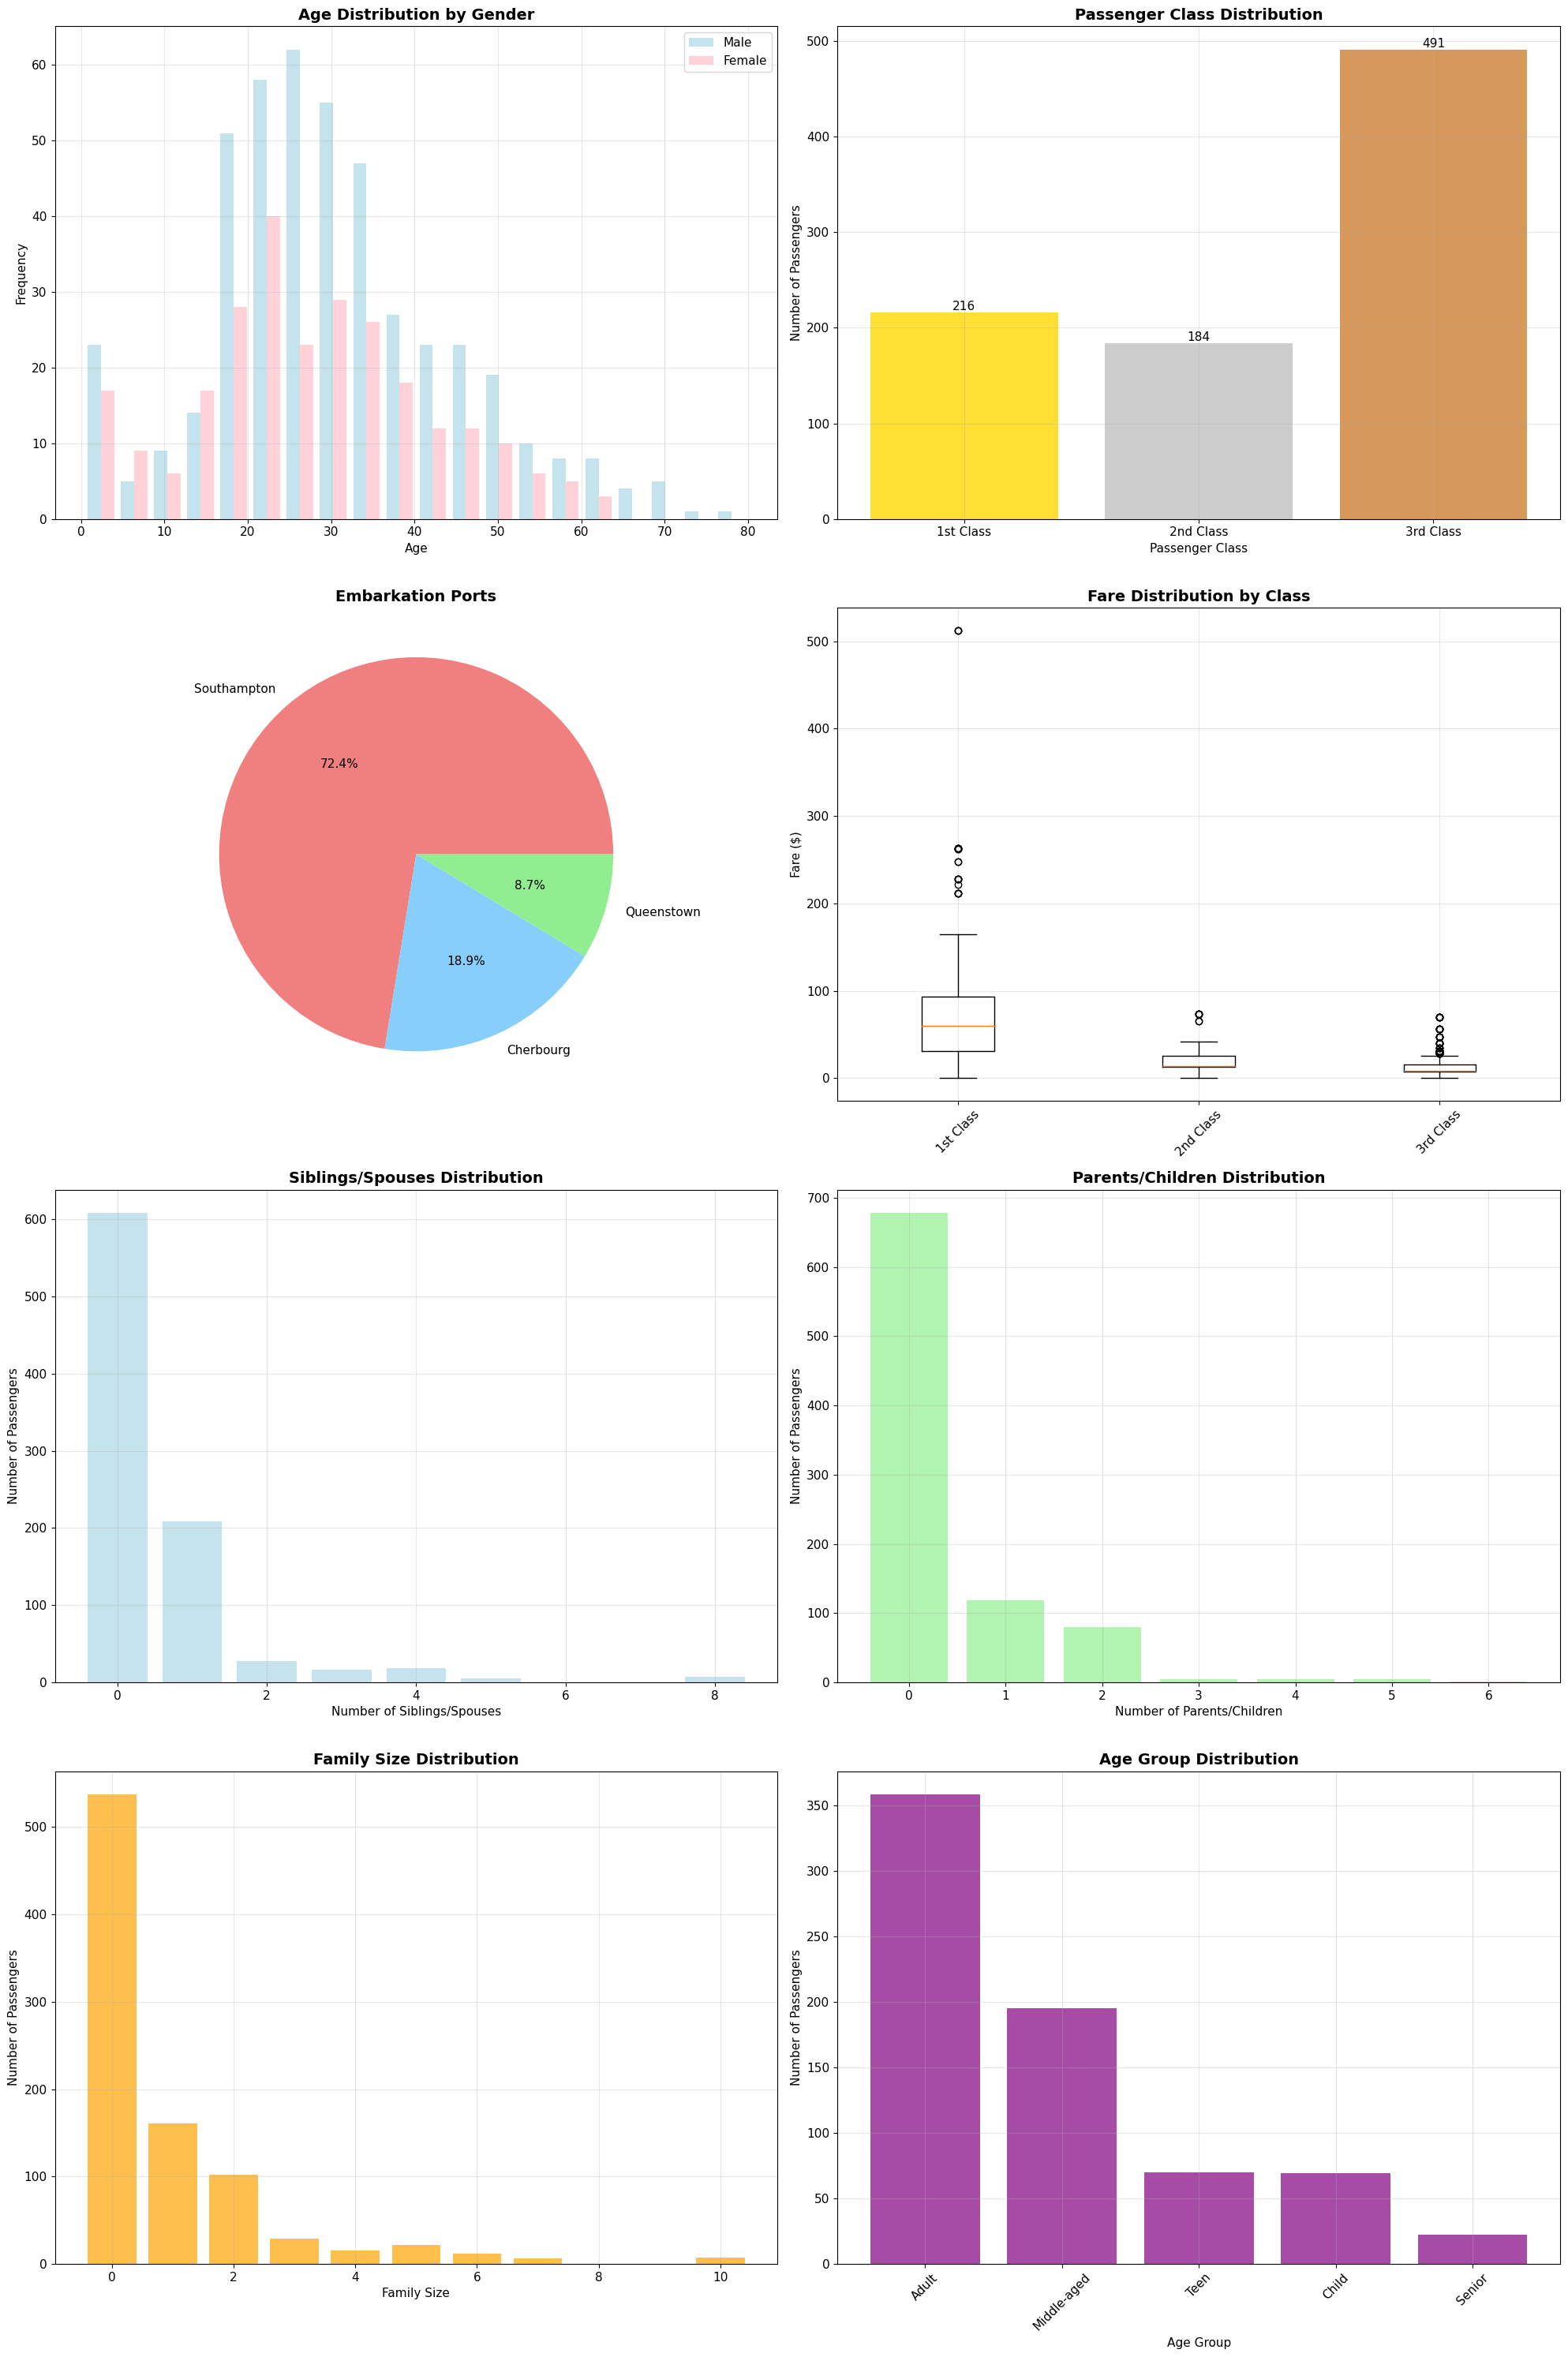

In [74]:
fig, axes = plt.subplots(4, 2, figsize=(20, 30))

# Age distribution by gender
ax1 = axes[0, 0]
male_ages = df[df['sex'] == 'male']['age'].dropna()
female_ages = df[df['sex'] == 'female']['age'].dropna()
ax1.hist([male_ages, female_ages], bins=20, alpha=0.7, 
         color=['lightblue', 'pink'], label=['Male', 'Female'])
ax1.set_title('Age Distribution by Gender', fontsize=14, fontweight='bold')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.legend()

# Passenger class distribution
ax2 = axes[0, 1]
class_counts = df['pclass'].value_counts().sort_index()
bars = ax2.bar(class_counts.index, class_counts.values, 
               color=['gold', 'silver', '#CD7F32'], alpha=0.8)
ax2.set_title('Passenger Class Distribution', fontsize=14, fontweight='bold')
ax2.set_xlabel('Passenger Class')
ax2.set_ylabel('Number of Passengers')
ax2.set_xticks([1, 2, 3])
ax2.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

# Embarkation port distribution
ax3 = axes[1, 0]
embarked_counts = df['embark_town'].value_counts()
ax3.pie(embarked_counts.values, labels=embarked_counts.index, 
        autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen'])
ax3.set_title('Embarkation Ports', fontsize=14, fontweight='bold')

# Fare distribution by class
ax4 = axes[1, 1]
class_fares = [df[df['pclass'] == i]['fare'] for i in [1, 2, 3]]
ax4.boxplot(class_fares, labels=['1st Class', '2nd Class', '3rd Class'])
ax4.set_title('Fare Distribution by Class', fontsize=14, fontweight='bold')
ax4.set_ylabel('Fare ($)')
ax4.tick_params(axis='x', rotation=45)

# Siblings/Spouses distribution
ax5 = axes[2, 0]
sibsp_counts = df['sibsp'].value_counts().sort_index()
ax5.bar(sibsp_counts.index, sibsp_counts.values, color='lightblue', alpha=0.7)
ax5.set_title('Siblings/Spouses Distribution', fontsize=14, fontweight='bold')
ax5.set_xlabel('Number of Siblings/Spouses')
ax5.set_ylabel('Number of Passengers')

# Parents/Children distribution
ax6 = axes[2, 1]
parch_counts = df['parch'].value_counts().sort_index()
ax6.bar(parch_counts.index, parch_counts.values, color='lightgreen', alpha=0.7)
ax6.set_title('Parents/Children Distribution', fontsize=14, fontweight='bold')
ax6.set_xlabel('Number of Parents/Children')
ax6.set_ylabel('Number of Passengers')

# Family size distribution
ax7 = axes[3, 0]
family_size_counts = df['family_size'].value_counts().sort_index()
ax7.bar(family_size_counts.index, family_size_counts.values, color='orange', alpha=0.7)
ax7.set_title('Family Size Distribution', fontsize=14, fontweight='bold')
ax7.set_xlabel('Family Size')
ax7.set_ylabel('Number of Passengers')

# Age groups analysis
ax8 = axes[3, 1]
df['age_group'] = pd.cut(df['age'], bins=[0, 12, 18, 35, 60, 100], 
                        labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])
age_group_counts = df['age_group'].value_counts()
ax8.bar(age_group_counts.index, age_group_counts.values, color='purple', alpha=0.7)
ax8.set_title('Age Group Distribution', fontsize=14, fontweight='bold')
ax8.set_xlabel('Age Group')
ax8.set_ylabel('Number of Passengers')
ax8.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Correlation Analyis

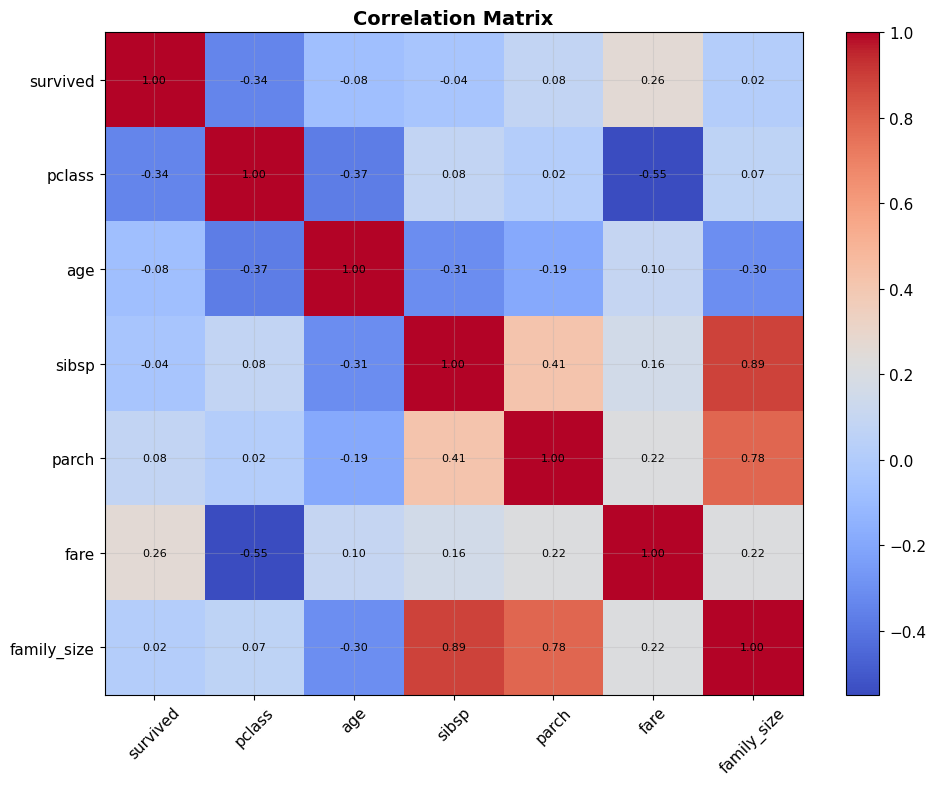

Correlation with Survival:


,Correlation with Survival
survived,1.000000
fare,0.257307
parch,0.081629
family_size,0.016639
sibsp,-0.035322
age,-0.077221
pclass,-0.338481


In [75]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
im = plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar(im)

# Display correlation coefficients
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()

# Display correlation table
print("="*60)
print("Correlation with Survival:")
print("="*60)
survival_corr = corr_matrix['survived'].sort_values(ascending=False)
display(survival_corr.to_frame('Correlation with Survival'))

## Summary Statistics and Insights

In [76]:
print("="*60)
print("KEY INSIGHTS AND FINDINGS")
print("="*60)

print(f"\nOVERALL STATISTICS:")
print(f" • Total Passengers: {total_passengers:,}")
print(f" • Survivors: {total_survived:,}")
print(f" • Overall Survival Rate: {survival_rate:.1f}%")

print(f"\nDEMOGRAPHICS:")
print(f" • Average Age: {df['age'].mean():.1f} years")
print(f" • Age Range: {df['age'].min():.0f} - {df['age'].max():.0f} years")
print(f" • Male Passengers: {(df['sex'] == 'male').sum():,} ({(df['sex'] == 'male').mean()*100:.1f}%)")
print(f" • Female Passengers: {(df['sex'] == 'female').sum():,} ({(df['sex'] == 'female').mean()*100:.1f}%)")

print(f"\nECONOMIC FACTORS:")
print(f" • Average Fare: ${df['fare'].mean():.2f}")
print(f" • Fare Range: ${df['fare'].min():.2f} - ${df['fare'].max():.2f}")
print(f" • 1st Class: {(df['pclass'] == 1).sum():,} passengers")
print(f" • 2nd Class: {(df['pclass'] == 2).sum():,} passengers")
print(f" • 3rd Class: {(df['pclass'] == 3).sum():,} passengers")

print(f"\nSURVIVAL INSIGHTS:")
print(f" • Female Survival Rate: {df[df['sex'] == 'female']['survived'].mean()*100:.1f}%")
print(f" • Male Survival Rate: {df[df['sex'] == 'male']['survived'].mean()*100:.1f}%")
print(f" • 1st Class Survival Rate: {df[df['pclass'] == 1]['survived'].mean()*100:.1f}%")
print(f" • 2nd Class Survival Rate: {df[df['pclass'] == 2]['survived'].mean()*100:.1f}%")
print(f" • 3rd Class Survival Rate: {df[df['pclass'] == 3]['survived'].mean()*100:.1f}%")

print(f"\nFAMILY STRUCTURE:")
print(f" • Passengers Traveling Alone: {(df['family_size'] == 0).sum():,}")
print(f" • Passengers with Family: {(df['family_size'] > 0).sum():,}")
print(f" • Average Family Size: {df['family_size'].mean():.1f}")

print(f"\nEMBARKATION:")
embark_counts = df['embark_town'].value_counts()
for port, count in embark_counts.items():
    print(f"   • {port}: {count:,} passengers")

print(f"\nDATA QUALITY:")
print(f" • Missing Age Values: {df['age'].isnull().sum():,}")
print(f" • Missing Deck Values: {df['deck'].isnull().sum():,}")
print(f" • Missing Embarked Values: {df['embark_town'].isnull().sum():,}")

print(f"\nAnalysis completed successfully!")
print("="*60)

KEY INSIGHTS AND FINDINGS

OVERALL STATISTICS:
 • Total Passengers: 891
 • Survivors: 342
 • Overall Survival Rate: 38.4%

DEMOGRAPHICS:
 • Average Age: 29.7 years
 • Age Range: 0 - 80 years
 • Male Passengers: 577 (64.8%)
 • Female Passengers: 314 (35.2%)

ECONOMIC FACTORS:
 • Average Fare: $32.20
 • Fare Range: $0.00 - $512.33
 • 1st Class: 216 passengers
 • 2nd Class: 184 passengers
 • 3rd Class: 491 passengers

SURVIVAL INSIGHTS:
 • Female Survival Rate: 74.2%
 • Male Survival Rate: 18.9%
 • 1st Class Survival Rate: 63.0%
 • 2nd Class Survival Rate: 47.3%
 • 3rd Class Survival Rate: 24.2%

FAMILY STRUCTURE:
 • Passengers Traveling Alone: 537
 • Passengers with Family: 354
 • Average Family Size: 0.9

EMBARKATION:
   • Southampton: 644 passengers
   • Cherbourg: 168 passengers
   • Queenstown: 77 passengers

DATA QUALITY:
 • Missing Age Values: 177
 • Missing Deck Values: 688
 • Missing Embarked Values: 2

Analysis completed successfully!
